In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import packages to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#magic word to help in plotting the visualization
%matplotlib inline

In [4]:
# make sure all the columns of the dataframe are shown
pd.options.display.max_columns = None

**Loading dataset**

In [5]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/MCS/MachineLearning/berka_dataset_with_state2.csv")

In [6]:
data.head()

,client_id,State,district_id,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,account_id,tenure,f_statement_issuance,branch_location_id,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,disp_id,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit
0,1.0,0,18.0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.09,True,1.0,4.0,monthly,18.0,Pisek,1.0,False,True,False,False,1.0,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,False,False,False,98.0,98.0
1,2.0,1,1.0,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,True,2.0,6.0,monthly,1.0,Hl.m. Praha,2.0,False,True,False,True,2.0,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0
2,3.0,1,1.0,59.0,F,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,False,2.0,6.0,monthly,1.0,Hl.m. Praha,2.0,False,True,False,True,3.0,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0
3,4.0,0,5.0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,True,3.0,2.0,monthly,5.0,Kolin,3.0,True,True,False,False,4.0,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0
4,5.0,0,5.0,39.0,F,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,False,3.0,2.0,monthly,5.0,Kolin,3.0,True,True,False,False,5.0,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0


In [7]:
#extract dataset information
def information(df):
    print(" Our dataset has the following number of Columns and Rows",df.shape)
    print("\n")
    print("We have the following columns",df.columns)
    print("\n")
    print("Our attributes have the following data types ",df.dtypes)
    print("\n")
    print("Here is the brief summary of our dataset", df.info(null_counts=True))
    print("\n")
    print("Our dataset have the following number of following attributes",df.nunique())
    print("\n")
    print("Our dataset have the following describe", df.describe())
    print("\n")
    print("Our dataset have the following missing values",df.isnull().sum())
    print("\n")
    print("Our dataset have this number of duplicates",sum(df.duplicated()))

In [8]:
information(data)

 Our dataset has the following number of Columns and Rows (5369, 46)


We have the following columns Index(['client_id', 'State', 'district_id', 'age', 'gender',
       'district_of_residence', 'district_inhabitant_count',
       'district_cities_count', 'district_urban_inhabitant_ratio',
       'district_average_salary', 'district_mun_inhabitant_count_499',
       'district_mun_inhabitant_count_1999',
       'district_mun_inhabitant_count_9999',
       'district_mun_inhabitant_count_infinite',
       'district_enterprenuer_per_1000', 'district_crimes_count',
       'district_unemployment_rate', 'owns_account', 'account_id', 'tenure',
       'f_statement_issuance', 'branch_location_id', 'branch_location',
       'orders_count', 'insurance_payment', 'household_payment',
       'lease_payment', 'loan_payment', 'disp_id', 'has_credit_card',
       'transaction_count', 'withdraw_transactions', 'credit_transactions',
       'credit_card_withdrawals', 'credit_in_cash',
       'collections_fr

<ipython-input-7-a7a5d0a104f2>:9: FutureWarning: null_counts is deprecated. Use show_counts instead
  print("Here is the brief summary of our dataset", df.info(null_counts=True))


**Exploring the predictor variable**

In [9]:
# first, lets separate the inputs (features) from the target variable.
y = data["State"]
# y
print(y.value_counts())

0    3506
1    1863
Name: State, dtype: int64


We have 3506 active customers and 1863 churned customers


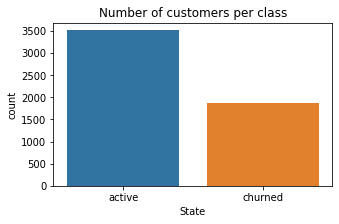

In [10]:
# let's visualize the value counts for the target variable
active, churned = y.value_counts()

plt.figure(figsize=(5,3))
ax = sns.countplot(x=y)
plt.title("Number of customers per class")
ax.set_xticklabels(["active", "churned"]);

print(f"We have {active} active customers and {churned} churned customers")

### Exploring the feature variables

In [11]:
# Preprocess the data
data = data.drop(columns=['client_id', 'account_id','district_id', 'disp_id', 'branch_location_id'], axis=1)  # Remove unnecessary columns

In [12]:
data.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.09,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,False,False,False,98.0,98.0
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0
2,1,59.0,F,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,False,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0
4,0,39.0,F,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,False,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0


**Add a feature for label names for our target column**

In [13]:
# Creating label names
label_dict = {0:'Active', 1:'Churned'}
# add label to the table
data['StateOfCustomer'] = [label_dict.get(i) for i in data.State]

In [14]:
data.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.09,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,False,False,False,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0,Churned
2,1,59.0,F,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.36,False,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,True,False,False,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0,Active
4,0,39.0,F,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.14,False,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,False,False,False,98.0,98.0,Active


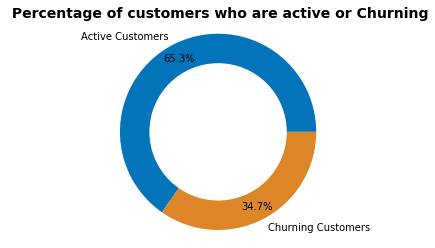

In [15]:
#Donut chart for Satate of Customer
A = data.query("StateOfCustomer == 'Active'")["StateOfCustomer"].count()
C = data.query("StateOfCustomer == 'Churned'")["StateOfCustomer"].count()
customer = [A, C]
labels = 'Active Customers', 'Churning Customers'
colors = ['#0474BA', '#DD8627']
plt.pie(customer, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('square');
plt.title(" Percentage of customers who are active or Churning", fontsize=14, weight='bold')
plt.show()

**Numerical Columns**

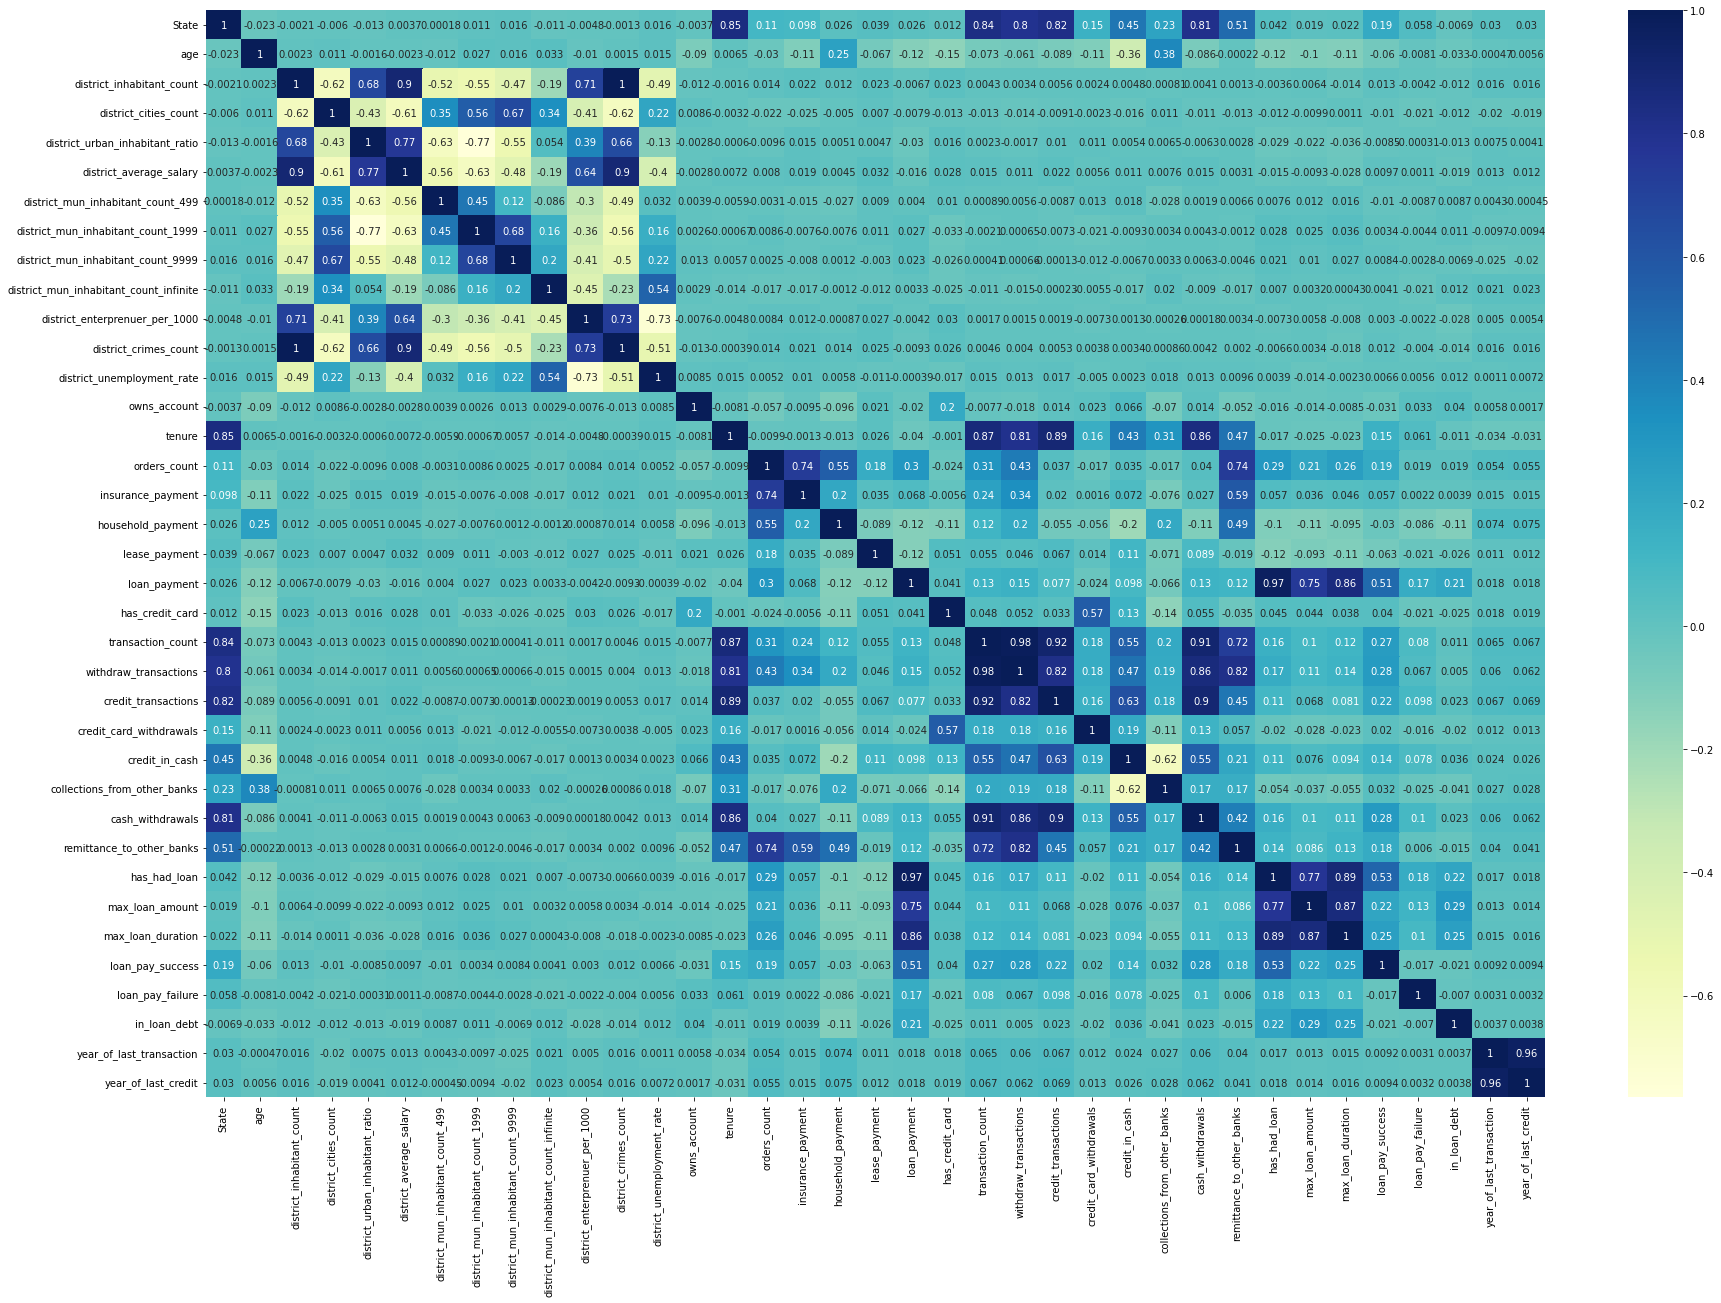

In [16]:
# Draw Correlation Matrix Heatmap to visualize the correlation between numerical columns
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
plt.show()

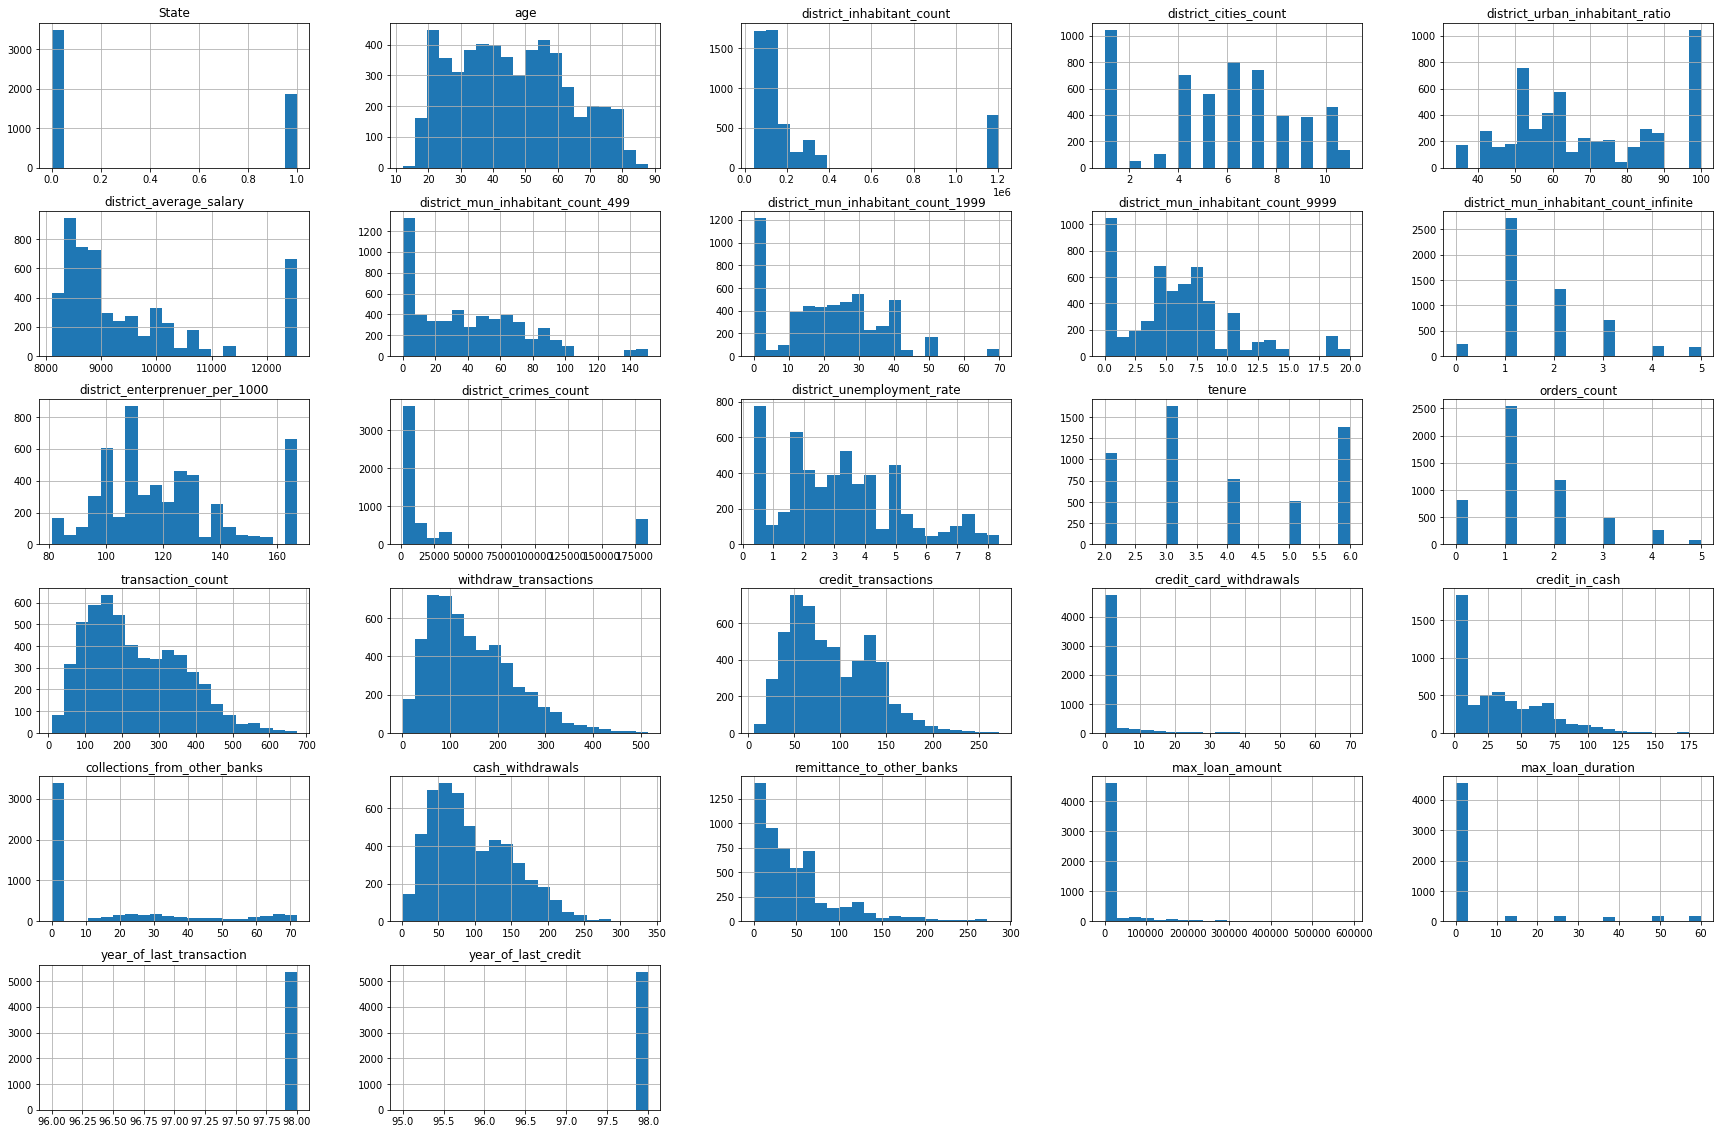

In [17]:
# visualize distributions of numerical columns
data.hist(bins=20,figsize=(30,20))
plt.show()

In [18]:
def bar_feature_comparison_for_continuous_variable(feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(f"Customer {feature}")

    sns.histplot(ax=axes[0], x=data[data["State"] == 0][feature])
    axes[0].set_title("Existing Customers")
    sns.histplot(ax=axes[1], x=data[data["State"] == 1][feature])
    axes[1].set_title("Churned Customers")

In [19]:
data.columns

Index(['State', 'age', 'gender', 'district_of_residence',
       'district_inhabitant_count', 'district_cities_count',
       'district_urban_inhabitant_ratio', 'district_average_salary',
       'district_mun_inhabitant_count_499',
       'district_mun_inhabitant_count_1999',
       'district_mun_inhabitant_count_9999',
       'district_mun_inhabitant_count_infinite',
       'district_enterprenuer_per_1000', 'district_crimes_count',
       'district_unemployment_rate', 'owns_account', 'tenure',
       'f_statement_issuance', 'branch_location', 'orders_count',
       'insurance_payment', 'household_payment', 'lease_payment',
       'loan_payment', 'has_credit_card', 'transaction_count',
       'withdraw_transactions', 'credit_transactions',
       'credit_card_withdrawals', 'credit_in_cash',
       'collections_from_other_banks', 'cash_withdrawals',
       'remittance_to_other_banks', 'has_had_loan', 'max_loan_amount',
       'max_loan_duration', 'loan_pay_success', 'loan_pay_failure',


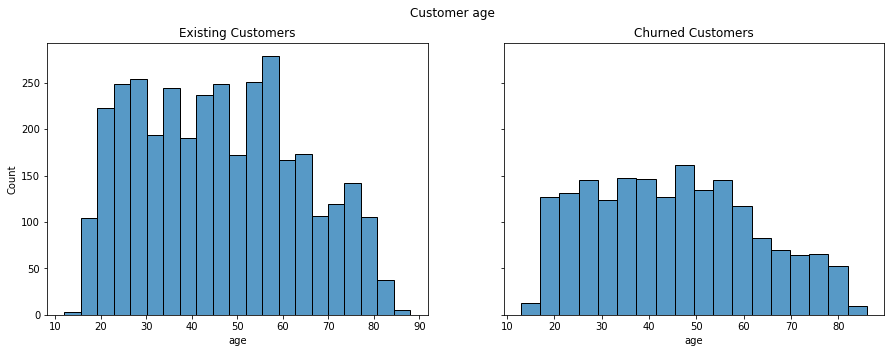

In [20]:
bar_feature_comparison_for_continuous_variable("age")

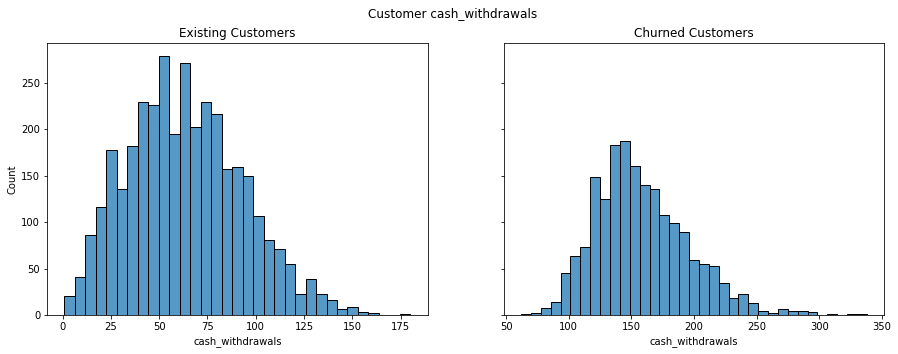

In [21]:
bar_feature_comparison_for_continuous_variable("cash_withdrawals")

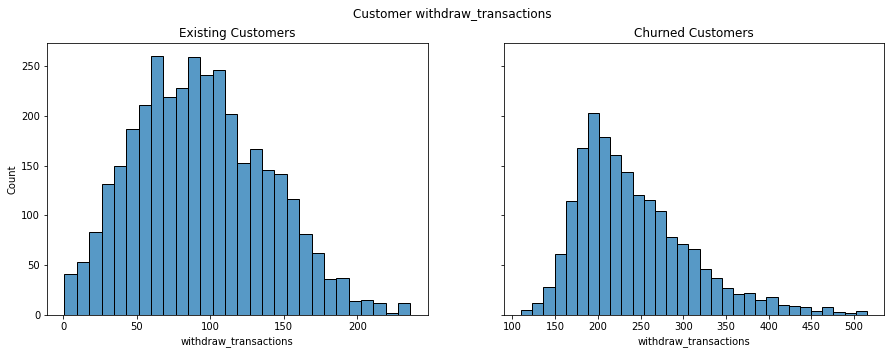

In [22]:
bar_feature_comparison_for_continuous_variable("withdraw_transactions")

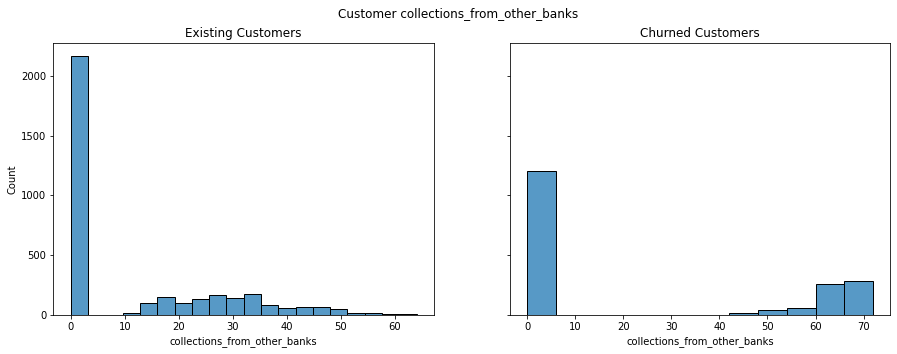

In [23]:
bar_feature_comparison_for_continuous_variable("collections_from_other_banks")

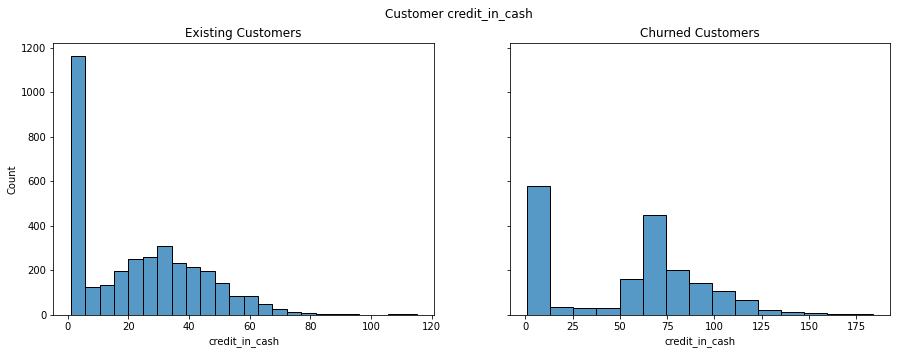

In [24]:
bar_feature_comparison_for_continuous_variable("credit_in_cash")

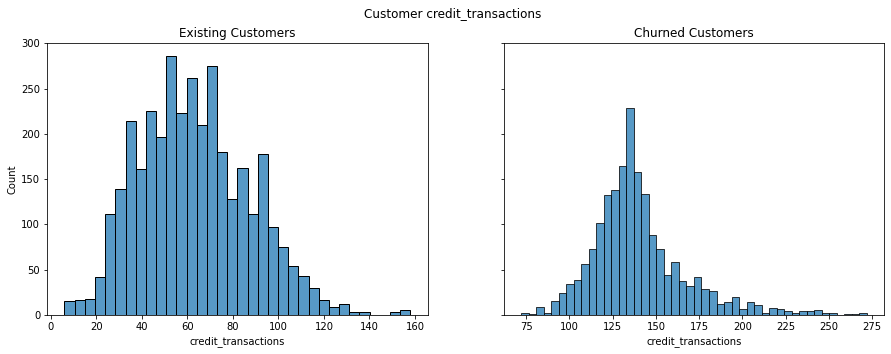

In [25]:
bar_feature_comparison_for_continuous_variable("credit_transactions")

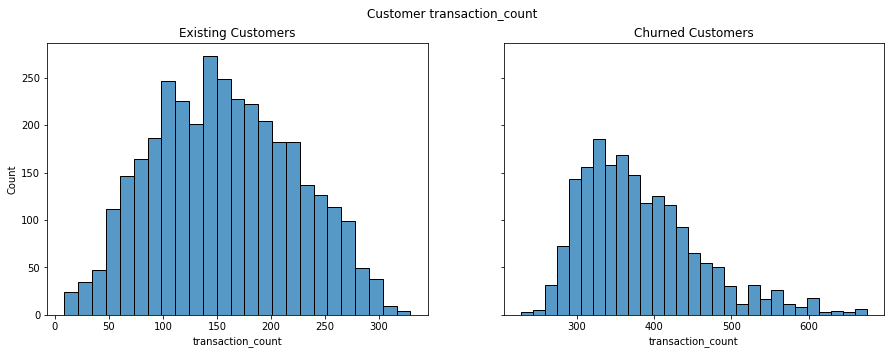

In [26]:
bar_feature_comparison_for_continuous_variable("transaction_count")

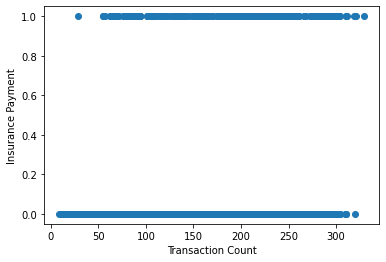

In [27]:
active_data = data[data["StateOfCustomer"] == "Active"]
plt.scatter(active_data["transaction_count"], active_data["insurance_payment"])
plt.xlabel("Transaction Count")
plt.ylabel("Insurance Payment")
plt.show()

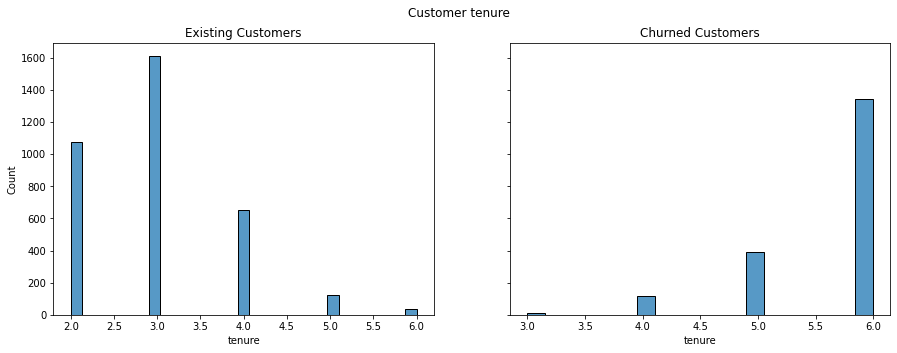

In [28]:
bar_feature_comparison_for_continuous_variable("tenure")

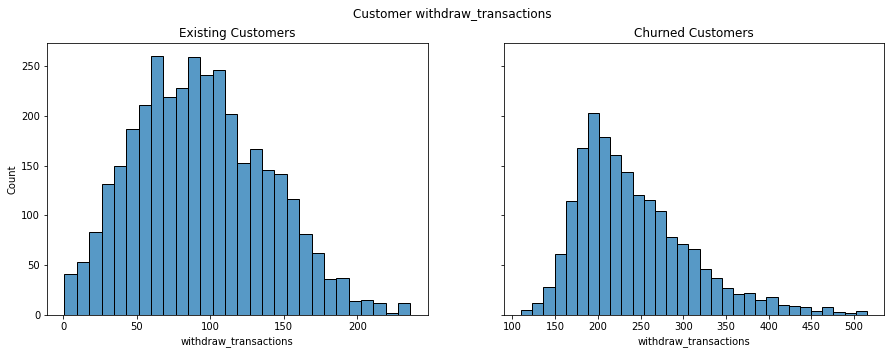

In [29]:
bar_feature_comparison_for_continuous_variable("withdraw_transactions")

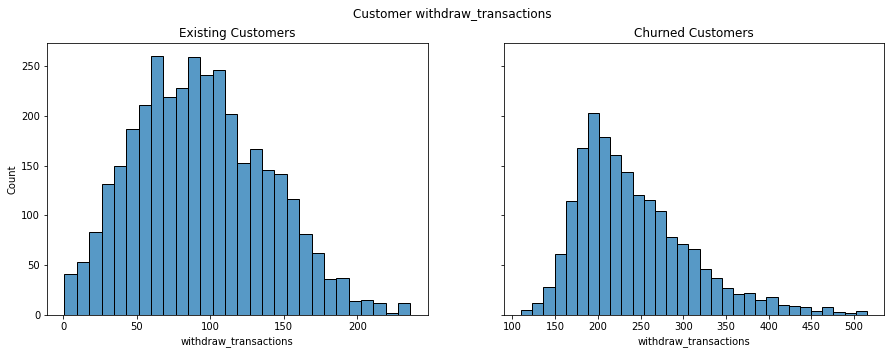

In [30]:
bar_feature_comparison_for_continuous_variable("withdraw_transactions")

**Categorical Columns**

In [31]:
# Get the frequency of unique values in the categorical columns
print(data.select_dtypes(include='object').apply(pd.Series.nunique, axis=0))

gender                    2
district_of_residence    77
f_statement_issuance      3
branch_location          77
StateOfCustomer           2
dtype: int64


**Leading ten Branch Location**

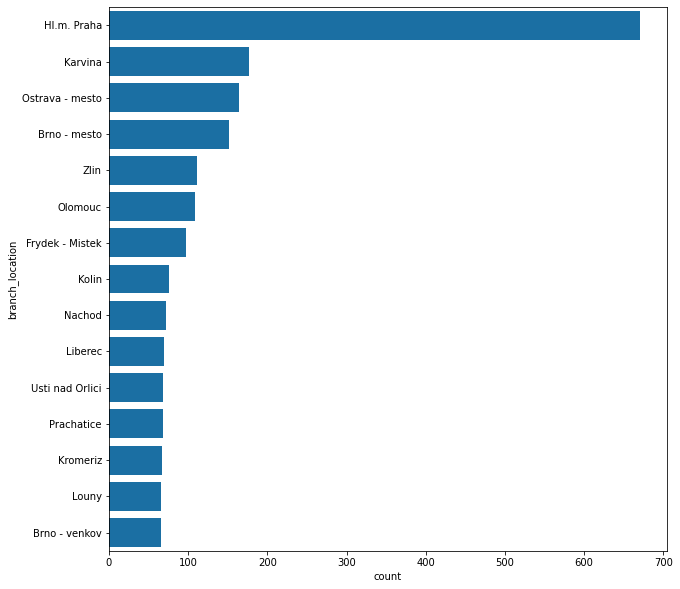

In [32]:
branch = data['branch_location'].value_counts().index[:15]
plt.figure(figsize=[10,10])
sns.countplot(data = data, y = 'branch_location', order = branch, color = "#0474BA");

In [33]:
def bar_feature_comparison_for_categorical_variable(feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(f"Customer {feature}")

    sns.countplot(ax=axes[0], x=data[data["State"] == 0][feature])
    axes[0].set_title("Existing Customers")
    sns.countplot(ax=axes[1], x=data[data["State"] == 1][feature])
    axes[1].set_title("Churned Customers")

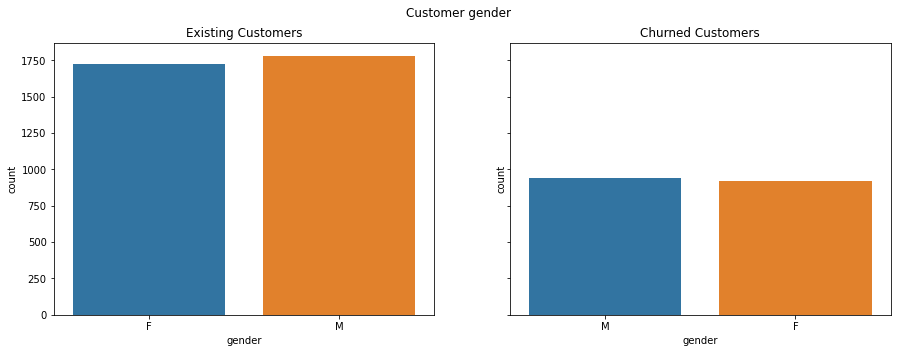

In [34]:
bar_feature_comparison_for_categorical_variable('gender')

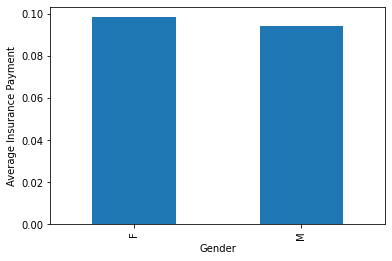

In [35]:
# Comparing the avarage "insurance_payment" by "gender" for customers who are "Active"
active_data = data[data["StateOfCustomer"] == "Active"]
average_insurance_payment = active_data.groupby("gender")["insurance_payment"].mean()
average_insurance_payment.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Average Insurance Payment")
plt.show()

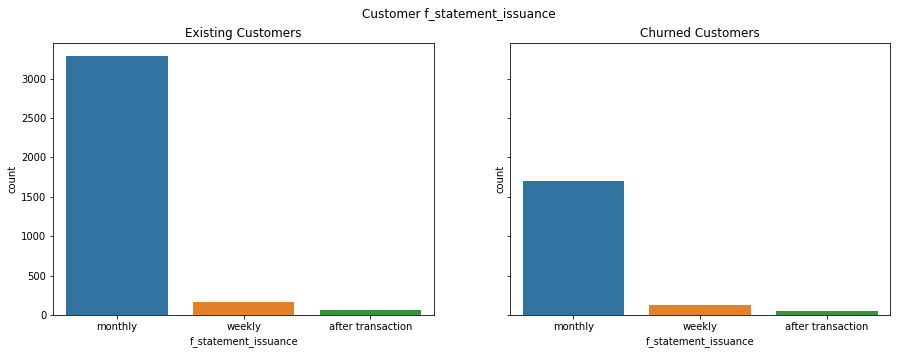

In [36]:
bar_feature_comparison_for_categorical_variable('f_statement_issuance')

<ipython-input-37-d93b24ff8f92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_pay_success'] = data['loan_pay_success'].astype(int)


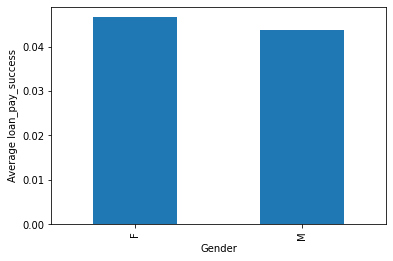

In [37]:
#compare the average loan_pay_success rate by "gender" for customers who owns_account
data = data[data['owns_account']]
data['loan_pay_success'] = data['loan_pay_success'].astype(int)
average_loan_pay_success = data.groupby("gender")["loan_pay_success"].mean()
average_loan_pay_success.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Average loan_pay_success")
plt.show()

In [38]:
pd.crosstab(data["gender"], data["owns_account"])

owns_account,True
gender,
F,2208
M,2292


**Multivariate Exploration**

In [39]:
data.columns

Index(['State', 'age', 'gender', 'district_of_residence',
       'district_inhabitant_count', 'district_cities_count',
       'district_urban_inhabitant_ratio', 'district_average_salary',
       'district_mun_inhabitant_count_499',
       'district_mun_inhabitant_count_1999',
       'district_mun_inhabitant_count_9999',
       'district_mun_inhabitant_count_infinite',
       'district_enterprenuer_per_1000', 'district_crimes_count',
       'district_unemployment_rate', 'owns_account', 'tenure',
       'f_statement_issuance', 'branch_location', 'orders_count',
       'insurance_payment', 'household_payment', 'lease_payment',
       'loan_payment', 'has_credit_card', 'transaction_count',
       'withdraw_transactions', 'credit_transactions',
       'credit_card_withdrawals', 'credit_in_cash',
       'collections_from_other_banks', 'cash_withdrawals',
       'remittance_to_other_banks', 'has_had_loan', 'max_loan_amount',
       'max_loan_duration', 'loan_pay_success', 'loan_pay_failure',


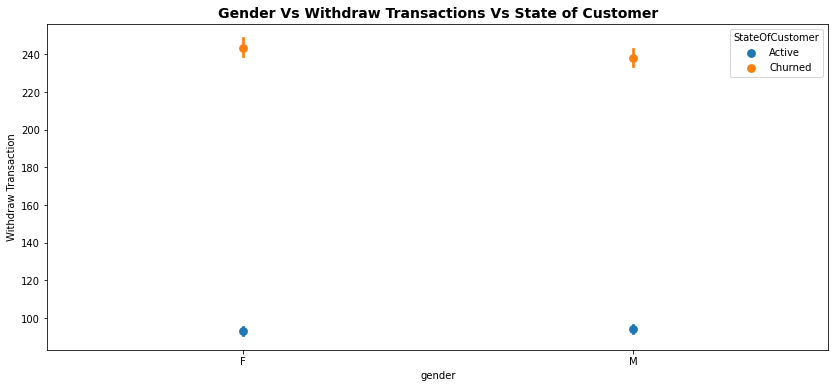

In [40]:
# Withdraw Transaction
fig = plt.figure(figsize = [14,6])
ax = sns.pointplot(data = data, x ='gender', y = 'withdraw_transactions', hue = 'StateOfCustomer', linestyles = '')
plt.title('Gender Vs Withdraw Transactions Vs State of Customer', fontsize=14, weight='bold')
plt.ylabel('Withdraw Transaction')
plt.show();

In [41]:
data.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.090,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.360,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,1,False,False,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.140,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
5,0,80.0,M,Pribram,107870.0,6.0,58.0,8754.0,84.0,29.0,6.0,1.0,137.0,7672.0,4.070,True,3.0,monthly,Pribram,2.0,False,True,False,False,False,186.0,121.0,65.0,0.0,1.0,34.0,62.0,59.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
6,0,70.0,M,Cesky Krumlov,58796.0,5.0,51.9,9045.0,22.0,16.0,7.0,1.0,124.0,3724.0,3.365,True,2.0,monthly,Cesky Krumlov,1.0,False,True,False,False,False,84.0,49.0,35.0,0.0,1.0,19.0,35.0,14.0,False,0.0,0.0,0,False,False,98.0,98.0,Active


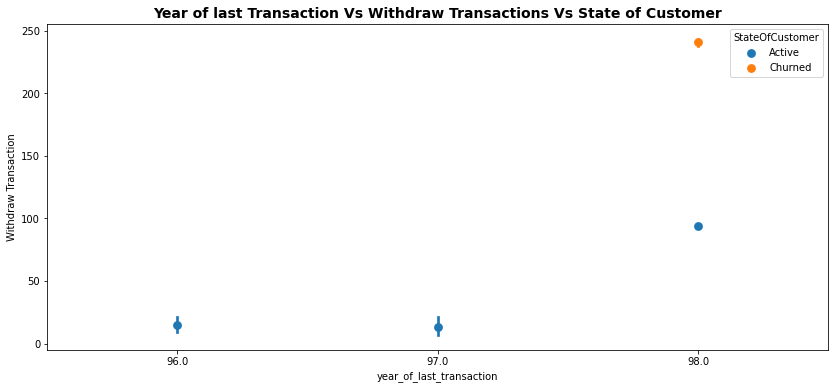

In [42]:
# Withdraw every year
fig = plt.figure(figsize = [14,6])
ax = sns.pointplot(data = data, x ='year_of_last_transaction', y = 'withdraw_transactions', hue = 'StateOfCustomer', linestyles = '')
plt.title('Year of last Transaction Vs Withdraw Transactions Vs State of Customer', fontsize=14, weight='bold')
plt.ylabel('Withdraw Transaction')
plt.show();

**Compare the state of customers (Active vs Churned) based on their demographic information**

In [43]:
df = data.copy()

In [44]:
#convert the StateOfCustomer variable to a categorical variable
df["StateOfCustomer"] = df["StateOfCustomer"].astype("category")

In [45]:
df.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.090,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.360,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,1,False,False,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.140,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
5,0,80.0,M,Pribram,107870.0,6.0,58.0,8754.0,84.0,29.0,6.0,1.0,137.0,7672.0,4.070,True,3.0,monthly,Pribram,2.0,False,True,False,False,False,186.0,121.0,65.0,0.0,1.0,34.0,62.0,59.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
6,0,70.0,M,Cesky Krumlov,58796.0,5.0,51.9,9045.0,22.0,16.0,7.0,1.0,124.0,3724.0,3.365,True,2.0,monthly,Cesky Krumlov,1.0,False,True,False,False,False,84.0,49.0,35.0,0.0,1.0,19.0,35.0,14.0,False,0.0,0.0,0,False,False,98.0,98.0,Active


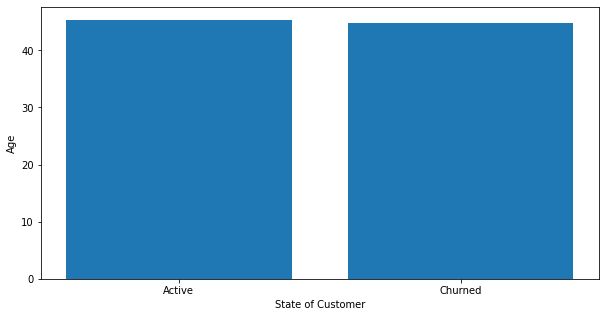

In [46]:
# A bar plot to compare the age distribution for Active vs Churned customers
plt.figure(figsize=(10,5))
plt.bar(df.groupby("StateOfCustomer")["age"].mean().index, df.groupby("StateOfCustomer")["age"].mean().values)
plt.xlabel("State of Customer")
plt.ylabel("Age")
plt.show()

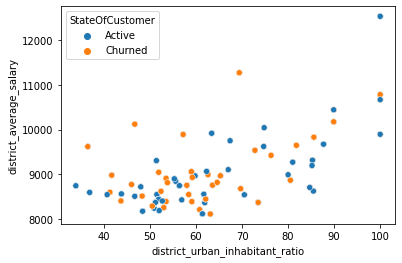

In [47]:
#A scatter plot to compare district_urban_inhabitant_ratio and district_average_salary for Active vs Churned customers

sns.scatterplot(x="district_urban_inhabitant_ratio", y="district_average_salary", hue="StateOfCustomer", data=data)
plt.show()

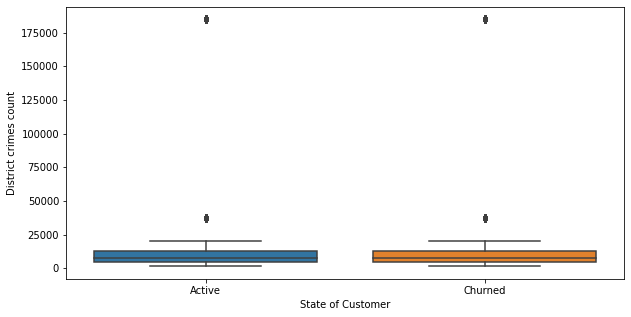

In [48]:
# A box plot to compare district_crimes_count for Active vs Churned customers
plt.figure(figsize=(10,5))
sns.boxplot(x="StateOfCustomer", y="district_crimes_count", data=data)
plt.xlabel("State of Customer")
plt.ylabel("District crimes count")
plt.show()

**Analyze the relationship between the financial variables and the state of the customer**

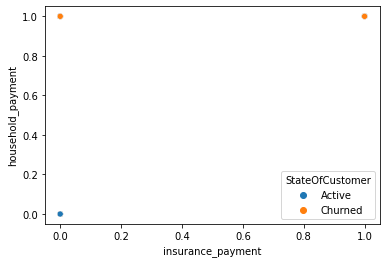

In [49]:
# Create scatter plot to compare insurance_payment and household_payment for Active vs Churned customers
sns.scatterplot(x="insurance_payment", y="household_payment", hue="StateOfCustomer", data=data)
plt.show()

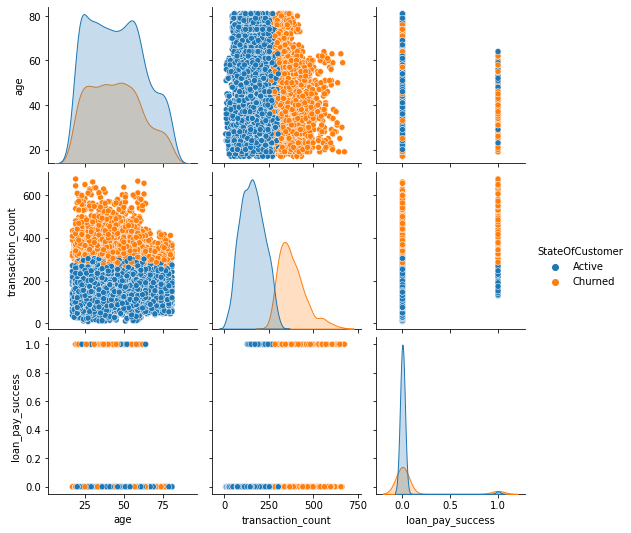

In [50]:
sns.pairplot(data, vars=["age", "transaction_count", "loan_pay_success"], hue="StateOfCustomer")

### Exploring the data distribution with box and violin plots

**scale the features**

In [51]:
# Get the frequency of unique values in the categorical columns
print(data.select_dtypes(include='object').apply(pd.Series.nunique, axis=0))

gender                    2
district_of_residence    77
f_statement_issuance      3
branch_location          77
StateOfCustomer           2
dtype: int64


In [52]:
data.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.090,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.360,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,1,False,False,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.140,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
5,0,80.0,M,Pribram,107870.0,6.0,58.0,8754.0,84.0,29.0,6.0,1.0,137.0,7672.0,4.070,True,3.0,monthly,Pribram,2.0,False,True,False,False,False,186.0,121.0,65.0,0.0,1.0,34.0,62.0,59.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
6,0,70.0,M,Cesky Krumlov,58796.0,5.0,51.9,9045.0,22.0,16.0,7.0,1.0,124.0,3724.0,3.365,True,2.0,monthly,Cesky Krumlov,1.0,False,True,False,False,False,84.0,49.0,35.0,0.0,1.0,19.0,35.0,14.0,False,0.0,0.0,0,False,False,98.0,98.0,Active


In [53]:
# Convert boolean values to numerical

from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

data['owns_account']= le.fit_transform(data['owns_account'])
data['insurance_payment']= le.fit_transform(data['insurance_payment'])
data['household_payment']= le.fit_transform(data['household_payment'])
data['lease_payment']= le.fit_transform(data['lease_payment'])
data['loan_payment']= le.fit_transform(data['loan_payment'])
data['has_credit_card']= le.fit_transform(data['has_credit_card'])
data['has_had_loan']= le.fit_transform(data['has_had_loan'])
data['loan_pay_failure']= le.fit_transform(data['loan_pay_failure'])
data['in_loan_debt']= le.fit_transform(data['in_loan_debt'])

In [54]:
data.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.090,0,4.0,monthly,Pisek,1.0,0,1,0,0,0,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,0,0.0,0.0,0,0,0,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.360,0,6.0,monthly,Hl.m. Praha,2.0,0,1,0,1,0,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,1,80952.0,24.0,1,0,0,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.140,0,2.0,monthly,Kolin,3.0,1,1,0,0,0,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,0,0.0,0.0,0,0,0,98.0,98.0,Active
5,0,80.0,M,Pribram,107870.0,6.0,58.0,8754.0,84.0,29.0,6.0,1.0,137.0,7672.0,4.070,0,3.0,monthly,Pribram,2.0,0,1,0,0,0,186.0,121.0,65.0,0.0,1.0,34.0,62.0,59.0,0,0.0,0.0,0,0,0,98.0,98.0,Active
6,0,70.0,M,Cesky Krumlov,58796.0,5.0,51.9,9045.0,22.0,16.0,7.0,1.0,124.0,3724.0,3.365,0,2.0,monthly,Cesky Krumlov,1.0,0,1,0,0,0,84.0,49.0,35.0,0.0,1.0,19.0,35.0,14.0,0,0.0,0.0,0,0,0,98.0,98.0,Active


In [55]:
features = ['age', 'district_inhabitant_count', 'district_cities_count',
       'district_urban_inhabitant_ratio', 'district_average_salary',
       'district_mun_inhabitant_count_499',
       'district_mun_inhabitant_count_1999',
       'district_mun_inhabitant_count_9999',
       'district_mun_inhabitant_count_infinite',
       'district_enterprenuer_per_1000', 'district_crimes_count',
       'district_unemployment_rate', 'owns_account', 'tenure', 'orders_count',
       'insurance_payment', 'household_payment', 'lease_payment',
       'loan_payment', 'has_credit_card', 'transaction_count',
       'withdraw_transactions', 'credit_transactions',
       'credit_card_withdrawals', 'credit_in_cash',
       'collections_from_other_banks', 'cash_withdrawals',
       'remittance_to_other_banks', 'has_had_loan', 'max_loan_amount',
       'max_loan_duration', 'loan_pay_success', 'loan_pay_failure',
       'in_loan_debt', 'year_of_last_transaction', 'year_of_last_credit']

In [56]:
df1 = data[features]

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()  # scale the features
df1[df1.columns] = scaler.fit_transform(df1[df1.columns])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [59]:
df1.head()

,age,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit
0,-0.943277,-0.551277,-0.522225,-0.197523,-0.408722,0.590795,-0.513325,-0.804907,-0.659776,0.429124,-0.466465,-0.040399,0.0,0.066199,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,0.033604,-0.087911,0.268203,-0.303545,-0.704163,1.365190,0.006356,-0.129577,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
1,0.520086,2.628893,-1.546790,1.553112,2.290038,-1.154577,-1.373623,-1.263892,-0.659776,1.991716,2.661219,-1.432282,0.0,1.414151,0.506706,-0.366159,0.580772,-0.28634,2.296987,-0.497221,1.917937,2.064496,1.387435,-0.303545,-0.704163,2.484002,2.537406,0.880630,2.366060,0.829236,1.258534,4.600814,-0.083287,-0.100504,0.039802,0.040964
3,-0.123794,-0.481416,0.160819,-0.898786,-0.152669,0.736243,0.611679,-0.345922,-0.659776,-0.135145,-0.431827,0.494941,0.0,-1.281752,1.408319,2.731052,0.580772,-0.28634,-0.435353,-0.497221,-0.928273,-0.839545,-0.985337,-0.303545,-0.210701,-0.648672,-1.168775,-0.150193,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
5,2.041983,-0.447059,0.160819,-0.565812,-0.570361,1.288944,0.545502,0.113063,-0.659776,0.689556,-0.397016,0.459252,0.0,-0.607776,0.506706,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-0.384260,-0.270125,-0.560029,-0.303545,-1.043418,0.872912,-0.626407,0.262136,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
6,1.456638,-0.584651,-0.180703,-0.873560,-0.350563,-0.514607,-0.314795,0.342556,-0.659776,0.125287,-0.465187,0.099809,0.0,-1.281752,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-1.188452,-1.090090,-1.231568,-0.303545,-1.043418,0.201625,-1.114538,-0.665605,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964


In [60]:
features2 = ['gender', 'district_of_residence', 'f_statement_issuance', 'branch_location', 'StateOfCustomer']

In [61]:
df2 = data[features2]
df2.head()

,gender,district_of_residence,f_statement_issuance,branch_location,StateOfCustomer
0,F,Pisek,monthly,Pisek,Active
1,M,Hl.m. Praha,monthly,Hl.m. Praha,Churned
3,M,Kolin,monthly,Kolin,Active
5,M,Pribram,monthly,Pribram,Active
6,M,Cesky Krumlov,monthly,Cesky Krumlov,Active


In [62]:
df1.head()

,age,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit
0,-0.943277,-0.551277,-0.522225,-0.197523,-0.408722,0.590795,-0.513325,-0.804907,-0.659776,0.429124,-0.466465,-0.040399,0.0,0.066199,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,0.033604,-0.087911,0.268203,-0.303545,-0.704163,1.365190,0.006356,-0.129577,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
1,0.520086,2.628893,-1.546790,1.553112,2.290038,-1.154577,-1.373623,-1.263892,-0.659776,1.991716,2.661219,-1.432282,0.0,1.414151,0.506706,-0.366159,0.580772,-0.28634,2.296987,-0.497221,1.917937,2.064496,1.387435,-0.303545,-0.704163,2.484002,2.537406,0.880630,2.366060,0.829236,1.258534,4.600814,-0.083287,-0.100504,0.039802,0.040964
3,-0.123794,-0.481416,0.160819,-0.898786,-0.152669,0.736243,0.611679,-0.345922,-0.659776,-0.135145,-0.431827,0.494941,0.0,-1.281752,1.408319,2.731052,0.580772,-0.28634,-0.435353,-0.497221,-0.928273,-0.839545,-0.985337,-0.303545,-0.210701,-0.648672,-1.168775,-0.150193,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
5,2.041983,-0.447059,0.160819,-0.565812,-0.570361,1.288944,0.545502,0.113063,-0.659776,0.689556,-0.397016,0.459252,0.0,-0.607776,0.506706,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-0.384260,-0.270125,-0.560029,-0.303545,-1.043418,0.872912,-0.626407,0.262136,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964
6,1.456638,-0.584651,-0.180703,-0.873560,-0.350563,-0.514607,-0.314795,0.342556,-0.659776,0.125287,-0.465187,0.099809,0.0,-1.281752,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-1.188452,-1.090090,-1.231568,-0.303545,-1.043418,0.201625,-1.114538,-0.665605,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964


In [63]:
df3 = pd.concat([df1, df2])
df3.head()

,age,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,gender,district_of_residence,f_statement_issuance,branch_location,StateOfCustomer
0,-0.943277,-0.551277,-0.522225,-0.197523,-0.408722,0.590795,-0.513325,-0.804907,-0.659776,0.429124,-0.466465,-0.040399,0.0,0.066199,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,0.033604,-0.087911,0.268203,-0.303545,-0.704163,1.365190,0.006356,-0.129577,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964,NaN,NaN,NaN,NaN,NaN
1,0.520086,2.628893,-1.546790,1.553112,2.290038,-1.154577,-1.373623,-1.263892,-0.659776,1.991716,2.661219,-1.432282,0.0,1.414151,0.506706,-0.366159,0.580772,-0.28634,2.296987,-0.497221,1.917937,2.064496,1.387435,-0.303545,-0.704163,2.484002,2.537406,0.880630,2.366060,0.829236,1.258534,4.600814,-0.083287,-0.100504,0.039802,0.040964,NaN,NaN,NaN,NaN,NaN
3,-0.123794,-0.481416,0.160819,-0.898786,-0.152669,0.736243,0.611679,-0.345922,-0.659776,-0.135145,-0.431827,0.494941,0.0,-1.281752,1.408319,2.731052,0.580772,-0.28634,-0.435353,-0.497221,-0.928273,-0.839545,-0.985337,-0.303545,-0.210701,-0.648672,-1.168775,-0.150193,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964,NaN,NaN,NaN,NaN,NaN
5,2.041983,-0.447059,0.160819,-0.565812,-0.570361,1.288944,0.545502,0.113063,-0.659776,0.689556,-0.397016,0.459252,0.0,-0.607776,0.506706,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-0.384260,-0.270125,-0.560029,-0.303545,-1.043418,0.872912,-0.626407,0.262136,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964,NaN,NaN,NaN,NaN,NaN
6,1.456638,-0.584651,-0.180703,-0.873560,-0.350563,-0.514607,-0.314795,0.342556,-0.659776,0.125287,-0.465187,0.099809,0.0,-1.281752,-0.394906,-0.366159,0.580772,-0.28634,-0.435353,-0.497221,-1.188452,-1.090090,-1.231568,-0.303545,-1.043418,0.201625,-1.114538,-0.665605,-0.422644,-0.328050,-0.376870,-0.217353,-0.083287,-0.100504,0.039802,0.040964,NaN,NaN,NaN,NaN,NaN


In [64]:
df2 = data[features2]
df2.head()

,gender,district_of_residence,f_statement_issuance,branch_location,StateOfCustomer
0,F,Pisek,monthly,Pisek,Active
1,M,Hl.m. Praha,monthly,Hl.m. Praha,Churned
3,M,Kolin,monthly,Kolin,Active
5,M,Pribram,monthly,Pribram,Active
6,M,Cesky Krumlov,monthly,Cesky Krumlov,Active


In [67]:
df.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,0,29.0,F,Pisek,70699.0,4.0,65.3,8968.0,60.0,13.0,2.0,1.0,131.0,3650.0,3.090,True,4.0,monthly,Pisek,1.0,False,True,False,False,False,239.0,137.0,102.0,0.0,12.0,45.0,97.0,40.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
1,1,54.0,M,Hl.m. Praha,1204953.0,1.0,100.0,12541.0,0.0,0.0,0.0,1.0,167.0,184784.0,0.360,True,6.0,monthly,Hl.m. Praha,2.0,False,True,False,True,False,478.0,326.0,152.0,0.0,12.0,70.0,237.0,89.0,True,80952.0,24.0,1,False,False,98.0,98.0,Churned
3,0,43.0,M,Kolin,95616.0,6.0,51.4,9307.0,65.0,30.0,4.0,1.0,118.0,5656.0,4.140,True,2.0,monthly,Kolin,3.0,True,True,False,False,False,117.0,71.0,46.0,0.0,28.0,0.0,32.0,39.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
5,0,80.0,M,Pribram,107870.0,6.0,58.0,8754.0,84.0,29.0,6.0,1.0,137.0,7672.0,4.070,True,3.0,monthly,Pribram,2.0,False,True,False,False,False,186.0,121.0,65.0,0.0,1.0,34.0,62.0,59.0,False,0.0,0.0,0,False,False,98.0,98.0,Active
6,0,70.0,M,Cesky Krumlov,58796.0,5.0,51.9,9045.0,22.0,16.0,7.0,1.0,124.0,3724.0,3.365,True,2.0,monthly,Cesky Krumlov,1.0,False,True,False,False,False,84.0,49.0,35.0,0.0,1.0,19.0,35.0,14.0,False,0.0,0.0,0,False,False,98.0,98.0,Active


**Feature scaling on integers and floats in a dataset only**

In [69]:
# Select only the columns that contain integers or floats
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [70]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [71]:
# Fit the scaler to the numerical columns
scaler.fit(df[numerical_columns])

StandardScaler()

In [72]:
# Scale the numerical columns
df[numerical_columns] = scaler.transform(df[numerical_columns])

In [73]:
df.head()

,State,age,gender,district_of_residence,district_inhabitant_count,district_cities_count,district_urban_inhabitant_ratio,district_average_salary,district_mun_inhabitant_count_499,district_mun_inhabitant_count_1999,district_mun_inhabitant_count_9999,district_mun_inhabitant_count_infinite,district_enterprenuer_per_1000,district_crimes_count,district_unemployment_rate,owns_account,tenure,f_statement_issuance,branch_location,orders_count,insurance_payment,household_payment,lease_payment,loan_payment,has_credit_card,transaction_count,withdraw_transactions,credit_transactions,credit_card_withdrawals,credit_in_cash,collections_from_other_banks,cash_withdrawals,remittance_to_other_banks,has_had_loan,max_loan_amount,max_loan_duration,loan_pay_success,loan_pay_failure,in_loan_debt,year_of_last_transaction,year_of_last_credit,StateOfCustomer
0,-0.727717,-0.943277,F,Pisek,-0.551277,-0.522225,-0.197523,-0.408722,0.590795,-0.513325,-0.804907,-0.659776,0.429124,-0.466465,-0.040399,True,0.066199,monthly,Pisek,-0.394906,False,True,False,False,False,0.033604,-0.087911,0.268203,-0.303545,-0.704163,1.365190,0.006356,-0.129577,False,-0.328050,-0.376870,-0.217353,False,False,0.039802,0.040964,Active
1,1.374161,0.520086,M,Hl.m. Praha,2.628893,-1.546790,1.553112,2.290038,-1.154577,-1.373623,-1.263892,-0.659776,1.991716,2.661219,-1.432282,True,1.414151,monthly,Hl.m. Praha,0.506706,False,True,False,True,False,1.917937,2.064496,1.387435,-0.303545,-0.704163,2.484002,2.537406,0.880630,True,0.829236,1.258534,4.600814,False,False,0.039802,0.040964,Churned
3,-0.727717,-0.123794,M,Kolin,-0.481416,0.160819,-0.898786,-0.152669,0.736243,0.611679,-0.345922,-0.659776,-0.135145,-0.431827,0.494941,True,-1.281752,monthly,Kolin,1.408319,True,True,False,False,False,-0.928273,-0.839545,-0.985337,-0.303545,-0.210701,-0.648672,-1.168775,-0.150193,False,-0.328050,-0.376870,-0.217353,False,False,0.039802,0.040964,Active
5,-0.727717,2.041983,M,Pribram,-0.447059,0.160819,-0.565812,-0.570361,1.288944,0.545502,0.113063,-0.659776,0.689556,-0.397016,0.459252,True,-0.607776,monthly,Pribram,0.506706,False,True,False,False,False,-0.384260,-0.270125,-0.560029,-0.303545,-1.043418,0.872912,-0.626407,0.262136,False,-0.328050,-0.376870,-0.217353,False,False,0.039802,0.040964,Active
6,-0.727717,1.456638,M,Cesky Krumlov,-0.584651,-0.180703,-0.873560,-0.350563,-0.514607,-0.314795,0.342556,-0.659776,0.125287,-0.465187,0.099809,True,-1.281752,monthly,Cesky Krumlov,-0.394906,False,True,False,False,False,-1.188452,-1.090090,-1.231568,-0.303545,-1.043418,0.201625,-1.114538,-0.665605,False,-0.328050,-0.376870,-0.217353,False,False,0.039802,0.040964,Active


**Plot the relation between boolean values and Target column**

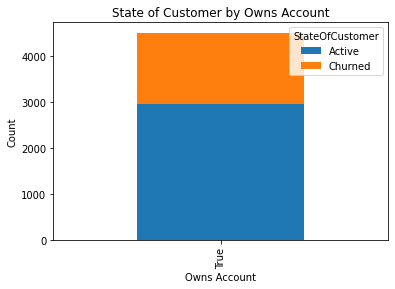

In [97]:
# Group data by "owns_account" and "StateOfCustomer" columns
grouped = df.groupby(["owns_account", "StateOfCustomer"]).size()

# Plot stacked bar chart
grouped.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Owns Account")
plt.ylabel("Count")
plt.title("State of Customer by Owns Account")
plt.show()

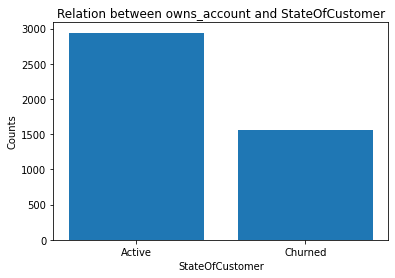

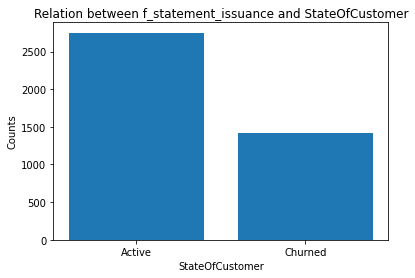

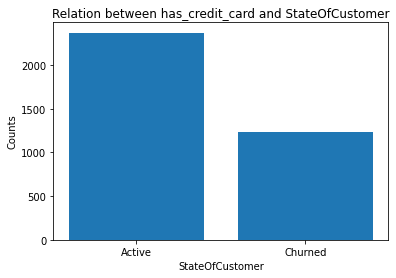

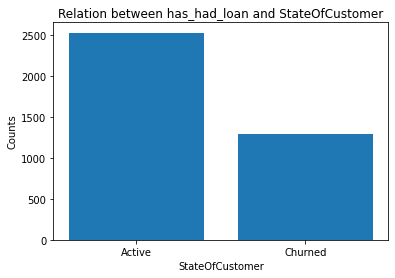

In [106]:
# Get the boolean columns
boolean_columns = ['owns_account', 'f_statement_issuance', 'has_credit_card', 'has_had_loan']

# Iterate over each boolean column
for column in boolean_columns:
    # Create a new figure
    plt.figure()
    # Get the counts of each value of the boolean column for each value of the target column
    counts = df.groupby(['StateOfCustomer', column]).size().reset_index(name='counts')
    # Plot the counts using a bar chart
    plt.bar(counts['StateOfCustomer'], counts['counts'])
    # Add a title to the figure
    plt.title(f'Relation between {column} and StateOfCustomer')
    # Add x and y labels to the figure
    plt.xlabel('StateOfCustomer')
    plt.ylabel('Counts')
    # Show the figure
    plt.show()

### Feature distribution based on gender

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

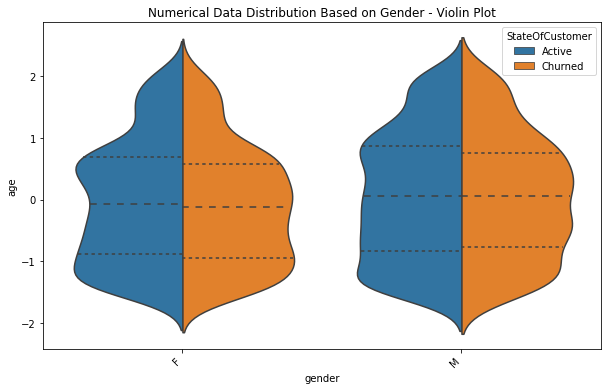

In [77]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender - Violin Plot")
feature = "age"
#create a violin plot
sns.violinplot(x="gender", y=feature, hue="StateOfCustomer", data=df, split=True, inner="quart")
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

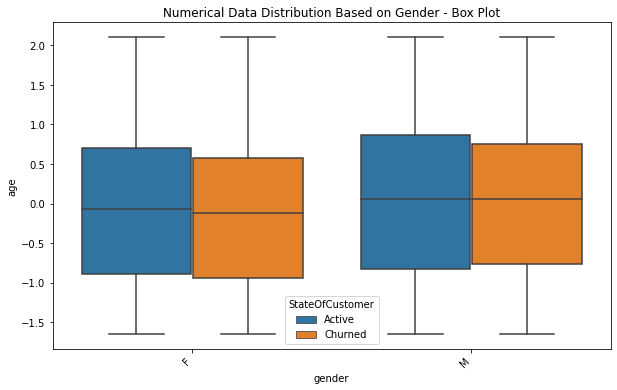

In [80]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender - Box Plot")
feature = "age"
#create a violin plot
sns.boxplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

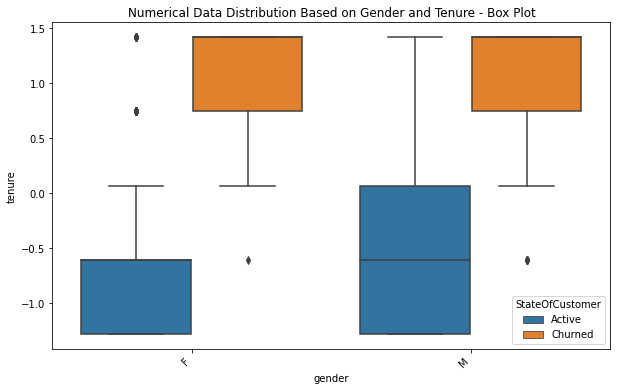

In [81]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "tenure"
#create a violin plot
sns.boxplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

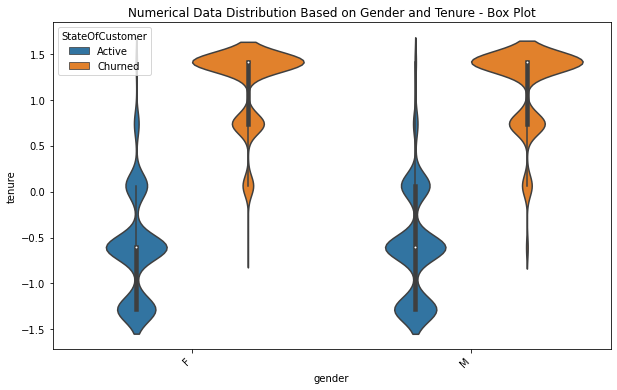

In [82]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "tenure"
#create a violin plot
sns.violinplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

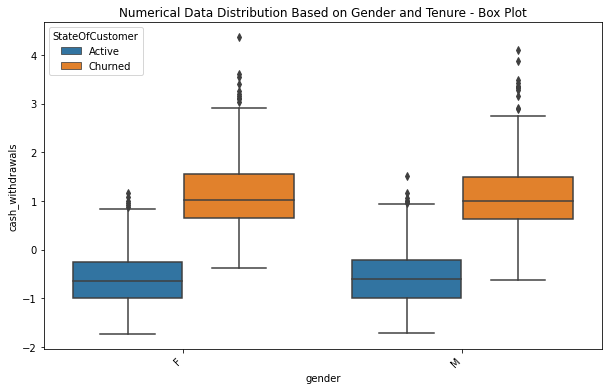

In [83]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "cash_withdrawals"
#create a violin plot
sns.boxplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

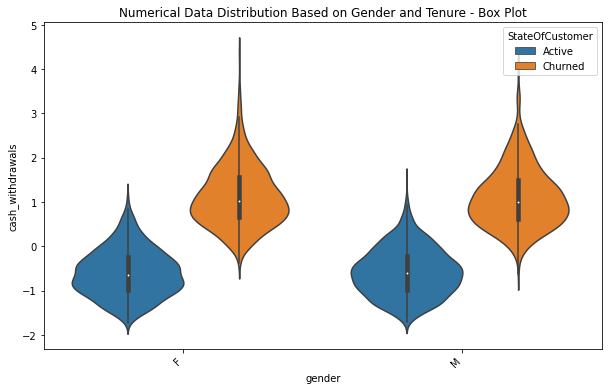

In [84]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "cash_withdrawals"
#create a violin plot
sns.violinplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

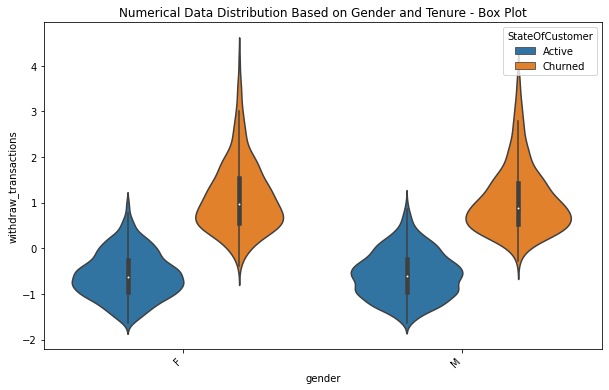

In [87]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "withdraw_transactions"
#create a violin plot
sns.violinplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

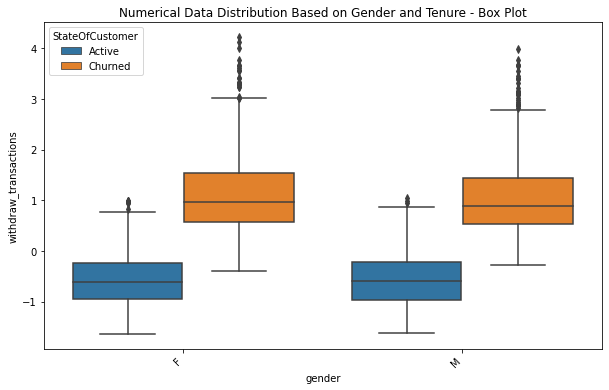

In [88]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on Gender and Tenure - Box Plot")
feature = "withdraw_transactions"
#create a violin plot
sns.boxplot(x="gender", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

### Feature distribution based on f_statement_issuance 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

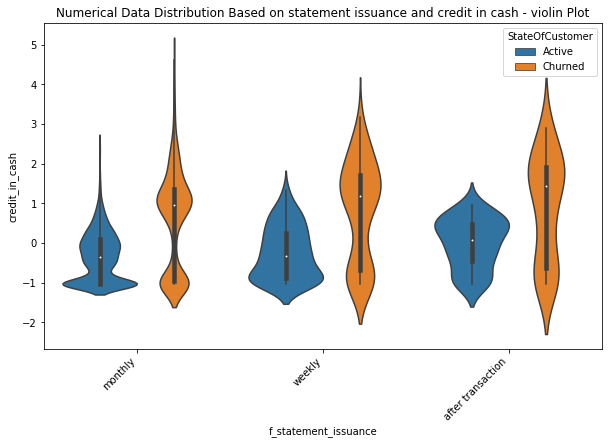

In [108]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on statement issuance and credit in cash - violin Plot")
feature = "credit_in_cash"
#create a violin plot
sns.violinplot(x="f_statement_issuance", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

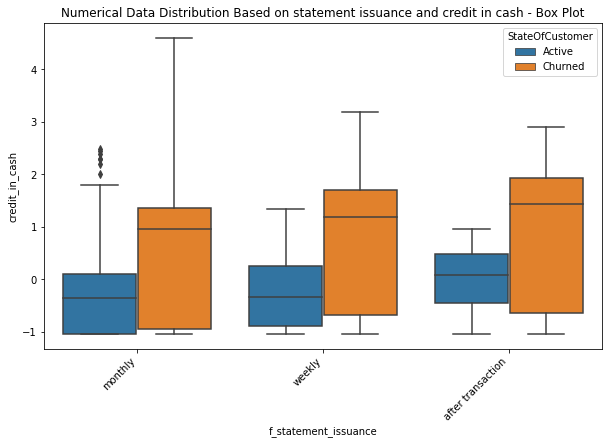

In [107]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on statement issuance and credit in cash - Box Plot")
feature = "credit_in_cash"
#create a violin plot
sns.boxplot(x="f_statement_issuance", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

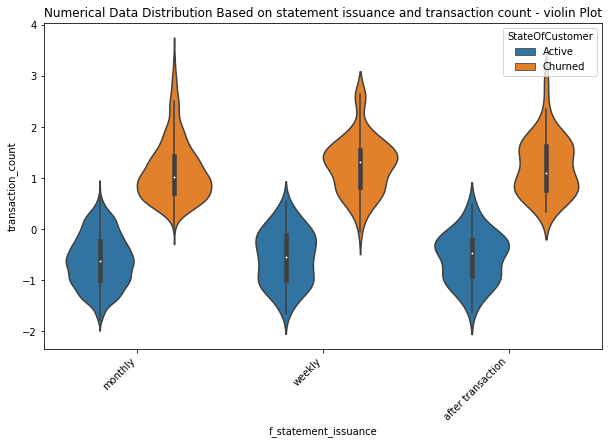

In [109]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on statement issuance and transaction count - violin Plot")
feature = "transaction_count"
#create a violin plot
sns.violinplot(x="f_statement_issuance", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

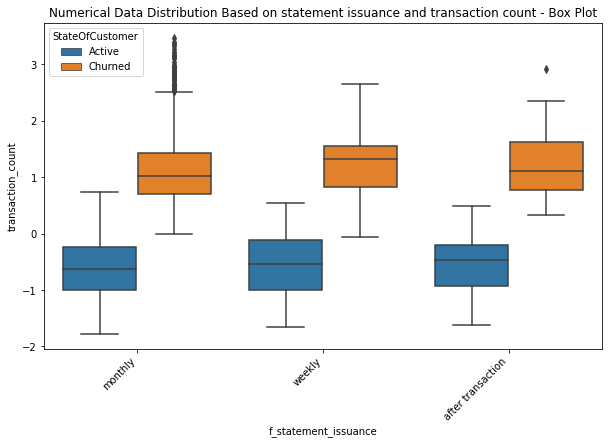

In [110]:
# create violin plot
plt.figure(figsize=(10, 6))
plt.title("Numerical Data Distribution Based on statement issuance and transaction count - Box Plot")
feature = "transaction_count"
#create a violin plot
sns.boxplot(x="f_statement_issuance", y=feature, hue="StateOfCustomer", data=df)
plt.xticks(rotation=45, ha="right")

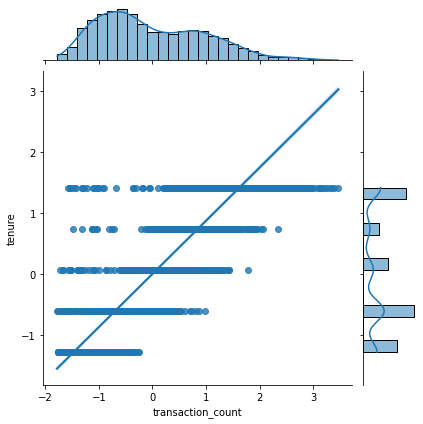

In [112]:
sns.jointplot(x=df.loc[:, "transaction_count"], y=df.loc[:, "tenure"], kind="reg");